# Retrieving the Dataset

In [1]:
# claiming the dataset
import pandas as pd

cxr_dataset = pd.read_csv("../features.csv")
cxr_dataset.head()

,Unnamed: 0,mean0,variance0,skewness0,uniformity0,snr0,mean1,variance1,skewness1,uniformity1,...,variance14,skewness14,uniformity14,snr14,mean15,variance15,skewness15,uniformity15,snr15,label
0,0,70.153934,1897.820090,0.155578,154,1.610366,67.820031,1431.488738,0.101886,149,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
1,1,67.943420,1640.924326,0.179606,158,1.677271,62.438356,1516.524282,0.382945,153,...,0.0,0.0,0,0.0,125.818182,59.954257,0.105233,38,16.249253,COVID-19
2,2,85.324244,1666.530997,-0.291033,153,2.090094,61.805752,1425.903805,0.326995,145,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
3,3,84.536424,1134.304302,-0.575772,129,2.510031,85.243692,957.789884,-0.289562,136,...,0.0,0.0,0,0.0,105.758879,247.749337,-0.316222,64,6.719092,COVID-19
4,4,97.321200,1344.070831,-0.521123,164,2.654583,102.034224,1417.579232,-0.313052,155,...,0.0,0.0,0,0.0,121.310059,518.784337,-0.373516,95,5.326027,COVID-19


In [2]:
drop_rows = cxr_dataset.loc[cxr_dataset['label'] == 'No Finding']
cxr_dataset.drop(drop_rows.index, inplace=True)
cxr_dataset['label'].unique()

array(['COVID-19', 'Pneumonia'], dtype=object)

# Splitting the dataset to train and test

In [3]:
# Getting the features needed

#get the feature columns
col_features = list(cxr_dataset.columns)
#get the label column
label = list(cxr_dataset.columns).pop()
#deleting label column from col
del col_features[0]
del col_features[len(col_features) - 1]

features = cxr_dataset.loc[:, col_features].values
labels = cxr_dataset.loc[:, label].values

display(pd.DataFrame(features))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,70.153934,1897.820090,0.155578,154.0,1.610366,67.820031,1431.488738,0.101886,149.0,1.792520,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,67.943420,1640.924326,0.179606,158.0,1.677271,62.438356,1516.524282,0.382945,153.0,1.603344,...,0.0,0.0,0.0,0.0,0.0,125.818182,59.954257,0.105233,38.0,16.249253
2,85.324244,1666.530997,-0.291033,153.0,2.090094,61.805752,1425.903805,0.326995,145.0,1.636755,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,84.536424,1134.304302,-0.575772,129.0,2.510031,85.243692,957.789884,-0.289562,136.0,2.754401,...,0.0,0.0,0.0,0.0,0.0,105.758879,247.749337,-0.316222,64.0,6.719092
4,97.321200,1344.070831,-0.521123,164.0,2.654583,102.034224,1417.579232,-0.313052,155.0,2.710018,...,0.0,0.0,0.0,0.0,0.0,121.310059,518.784337,-0.373516,95.0,5.326027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,51.064488,991.876323,0.621574,126.0,1.621400,52.246799,729.717895,0.936405,126.0,1.934115,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
196,77.161636,1411.740183,-0.000914,146.0,2.053639,87.498747,1487.581661,-0.322070,152.0,2.268618,...,0.0,0.0,0.0,0.0,0.0,109.789790,496.532388,-0.281837,90.0,4.927064
197,66.613725,1141.174321,0.262282,139.0,1.971913,69.993325,1126.649834,0.166404,150.0,2.085269,...,0.0,0.0,0.0,0.0,0.0,98.164975,526.625068,-0.138085,89.0,4.277655
198,88.374892,2123.046469,-0.183495,172.0,1.918002,69.177031,1328.168100,0.021836,148.0,1.898171,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [4]:
from sklearn.model_selection import train_test_split

# Separating test and train dataset
train_features, test_features, train_lbl, test_lbl = train_test_split( features, labels, test_size=0.2, random_state=0)

In [5]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting of training dataset only
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Applying Principal Component Analysis

In [6]:
# Feeding it to Principal Component Analysis
from sklearn.decomposition import PCA

# 5 different variance
variances = ["100%", "99%", "95%", "90%", "85%"]
pca = [PCA(), PCA(.99), PCA(.95), PCA(.90), PCA(.85)]
# results of each PCA variance
pca_fit = []

for p in pca:
    pca_content = {"fit": None, "transforms": {"train": None, "test": None}}
    pca_content["fit"] = p.fit(train_features)
    pca_content["transforms"]["train"] = p.transform(train_features)
    pca_content["transforms"]["test"] = p.transform(test_features)
    pca_fit.append(pca_content)

In [7]:
# checking the number of Principal Component
print("From 80 features")
for i in range(len(variances)):
    print(f"Principal Components with {variances[i]} variance:", pca_fit[i]["fit"].n_components_)

From 80 features
Principal Components with 100% variance: 80
Principal Components with 99% variance: 56
Principal Components with 95% variance: 38
Principal Components with 90% variance: 28
Principal Components with 85% variance: 23


# Applying Linear Discriminant Analysis

### Libraries Needed

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

import numpy as np

lda = LinearDiscriminantAnalysis()

### With Principal Component Analysis

In [9]:
# Evaluating of Model
for i in range(len(pca_fit)):
    # define model evaluation method
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(lda, pca_fit[i]["transforms"]["train"], np.ravel(train_lbl), scoring='accuracy', cv=cv)
    # summarize result
    print('Variance of %s:\nMean Accuracy: %.4f (%.4f)\n' % (variances[i], np.mean(scores), np.std(scores)))

Variance of 100%:
Mean Accuracy: 0.6000 (0.0800)

Variance of 99%:
Mean Accuracy: 0.5687 (0.0859)

Variance of 95%:
Mean Accuracy: 0.5437 (0.1342)

Variance of 90%:
Mean Accuracy: 0.5687 (0.1517)

Variance of 85%:
Mean Accuracy: 0.5750 (0.1672)



In [10]:
#Train the model
results = [] # where all the results will place
ldas = []

for i in range(len(pca_fit)):
    lda_train = lda.fit(pca_fit[i]["transforms"]["train"], np.ravel(train_lbl))
    ldas.append(lda_train)
    predictions = lda_train.predict(pca_fit[i]["transforms"]["test"])
    results.append(predictions)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for i in range(len(pca_fit)):
    print("Variance of", variances[i])
    print("Accuracy Score -", accuracy_score(test_lbl, results[i]))
    
    print("Confusion Matrix")
    print(confusion_matrix(test_lbl, results[i]))
    
    print("Classification Report")
    print(classification_report(test_lbl, results[i]))
    
    print()

Variance of 100%
Accuracy Score - 0.55
Confusion Matrix
[[14  4]
 [14  8]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.50      0.78      0.61        18
   Pneumonia       0.67      0.36      0.47        22

    accuracy                           0.55        40
   macro avg       0.58      0.57      0.54        40
weighted avg       0.59      0.55      0.53        40


Variance of 99%
Accuracy Score - 0.65
Confusion Matrix
[[14  4]
 [10 12]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.58      0.78      0.67        18
   Pneumonia       0.75      0.55      0.63        22

    accuracy                           0.65        40
   macro avg       0.67      0.66      0.65        40
weighted avg       0.68      0.65      0.65        40


Variance of 95%
Accuracy Score - 0.6
Confusion Matrix
[[14  4]
 [12 10]]
Classification Report
              precision    recall  f1-score   support

 

### Without Principal Component Analysis

In [12]:
# Performing towards the untransformed dataset

# define model evaluation method
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(lda, train_features, np.ravel(train_lbl), scoring='accuracy', cv=cv)

# summarize result
print('Linear Discriminant Analysis Cross Validation Score:\nMean Accuracy - %.4f (%.4f)\n' % (np.mean(scores), np.std(scores)))

Linear Discriminant Analysis Cross Validation Score:
Mean Accuracy - 0.6000 (0.0800)



In [13]:
lda.fit(train_features, np.ravel(train_lbl))
predictions = lda.predict(test_features)

In [14]:
print("Linear Disriminant Analysis Performance")
print("Accuracy Score -", accuracy_score(test_lbl, predictions))

print("Confusion Matrix")
print(confusion_matrix(test_lbl, predictions))

print("Classification Report")
print(classification_report(test_lbl, predictions))

Linear Disriminant Analysis Performance
Accuracy Score - 0.55
Confusion Matrix
[[14  4]
 [14  8]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.50      0.78      0.61        18
   Pneumonia       0.67      0.36      0.47        22

    accuracy                           0.55        40
   macro avg       0.58      0.57      0.54        40
weighted avg       0.59      0.55      0.53        40



In [15]:
# saving model as a pickle
#import pickle

#pickle.dump(ldas[1],open("lda1-covid-pneu.sav", "wb"))

In [16]:
#accuracy_score(test_lbl, results[1])
#ldas[1].predict([[80.69947407963937, 1269.4288426986145, -0.67499210392419, 144, 2.2649912237562297, 59.89109766637856, 1560.3788057959928, 0.4601313161779094, 142, 1.5161677386578594, 65.7536231884058, 1726.2668346985924, -0.08865097966591508, 124, 1.5825801898436467, 48.15653495440729, 1324.0773205162554, 0.4718451803368274, 134, 1.3234226306095302, 102.12631578947368, 321.77351800554015, 0.022913679792898232, 69, 5.693279637440712, 86.16784702549575, 470.625510095579, 0.186041642695024, 95, 3.9719841769645834, 0, 0, 0, 0, 0, 113.52201257861635, 119.24322613820655, -0.30065746045526565, 44, 10.395927047576272, 98.92756756756756, 338.21421300219146, 0.17355633855272548, 76, 5.379245975588224, 95.11693548387096, 258.13148738293444, 0.46243019975144345, 68, 5.920213346079804, 0, 0, 0, 0, 0, 79.04697986577182, 1382.5011485969098, -0.2991781648197267, 130, 2.1259474789571735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52.550424128180964, 2109.4293612715765, 0.32448564427869414, 133, 1.1441783666827834]])

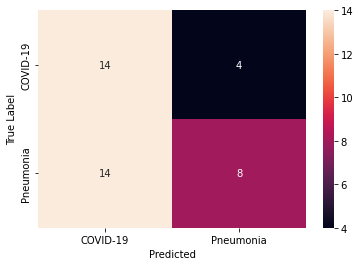

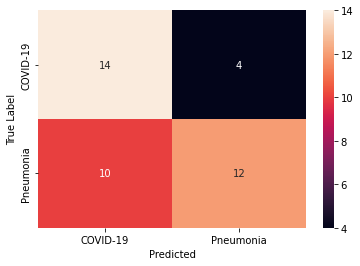

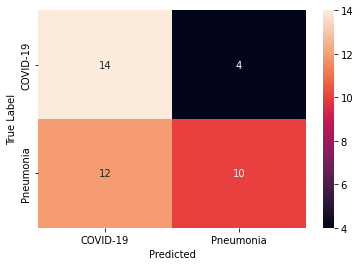

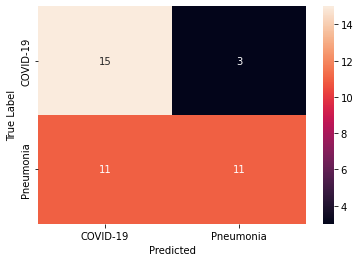

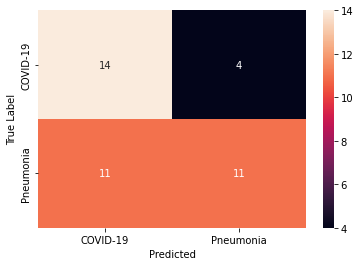

In [18]:
#Display Confusion Matrix
#Credits: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


for conf_idx in range(len(results)):
    conf_matrix = confusion_matrix(test_lbl, results[conf_idx])
    df_cm = pd.DataFrame(
        conf_matrix, index=['COVID-19', 'Pneumonia'], columns=['COVID-19', 'Pneumonia'], 
    )
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
    
    plt.ylabel("True Label")
    plt.xlabel("Predicted")
    plt.show()

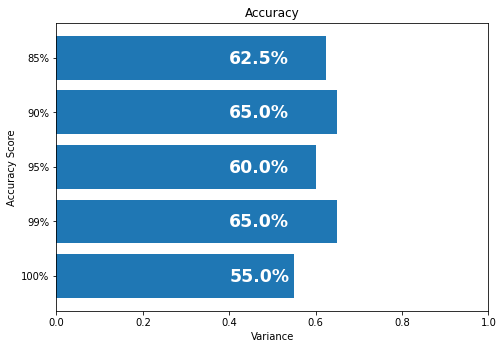

In [29]:
# For Accuracy, Precision, 
accuracies = []
threshold = -0.1

fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

for i in range(len(results)):
    accuracies.append(accuracy_score(test_lbl, results[i]))
    ax.text(0.4, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontweight='bold', fontsize="xx-large")
    threshold = threshold + 1
    
ax.barh(variances, accuracies)
ax.set(xlim=[0, 1])
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Variance')
plt.title("Accuracy")
plt.show()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Functions
def getPrecisionScore(result, label, avg = 'binary'):
    return precision_score(test_lbl, result, average=avg, pos_label=label)
    
def getRecallScore(result, label, avg = 'binary'):
    return recall_score(test_lbl, result, average=avg, pos_label=label)

def getF1Score(result, label, avg = 'binary'):
    return f1_score(test_lbl, result, average=avg, pos_label=label)

In [51]:
#Function for Classification Report Horizontal Bar Graph.
# Applicable for 2 class only
def barHCustom(title, scoreFunction, results, class_labels):
    
    def textBarh(starting, variance, fontweight='regular'):
        ax.text(0.2, starting, str(round(variance, 2)) + '%', color='white', fontweight='bold', fontsize="medium")
        
    #Get data score of each label
    data = [
        [scoreFunction(r, "COVID-19") for r in results],
        [scoreFunction(r, "Pneumonia") for r in results]
    ]
    
    ind = np.arange(5)
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind + 0.20, data[0], width, color='green', label=class_labels[0])
    ax.barh(ind + 0.60, data[1], width, color='red', label=class_labels[1])
    
    starting = 0.1
    for d in data[0]:
        textBarh(starting, d*100)
        starting = starting + 1

    starting = 0.5
    for d in data[1]:
        textBarh(starting, d*100)
        starting = starting + 1  
        
    ax.set(yticks=ind + width, yticklabels=['100%', '99%', '95%', "90%", "85%"], ylim=[2*width - 1, 5], xlim=[0, 1.2])
    ax.legend()
    ax.set_ylabel('Variance')
    ax.set_xlabel('Percent')
    plt.title(title)
    plt.show()

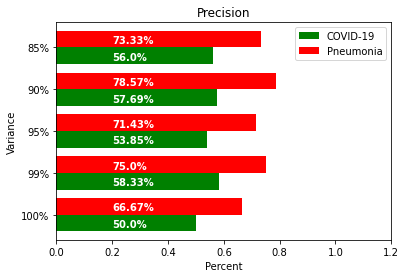

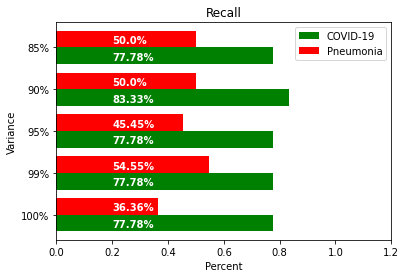

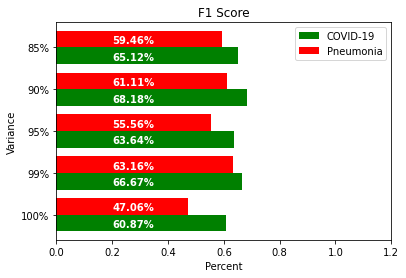

In [52]:
barHCustom("Precision", getPrecisionScore, results, class_labels=['COVID-19', 'Pneumonia'])
barHCustom("Recall", getRecallScore, results, class_labels=['COVID-19', 'Pneumonia'])
barHCustom("F1 Score", getF1Score, results, class_labels=['COVID-19', 'Pneumonia'])